In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT
# July 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_samples(x1, x2, y, D):
    plt.figure(figsize=(6, 4))
    plt.scatter(x1[y == 1], x2[y == 1], marker='+', c='blue', s=D[y == 1] * 2000)
    plt.scatter(x1[y == -1], x2[y == -1], marker='_', c='red', s=D[y == -1] * 2000)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

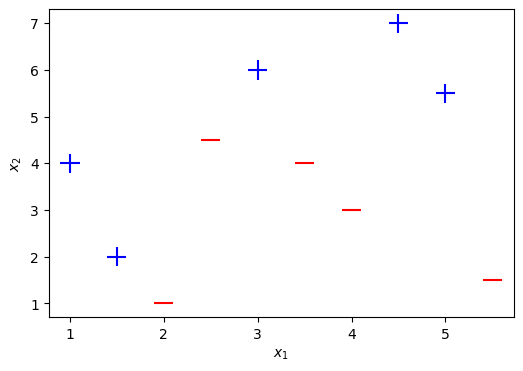

In [4]:
x1 = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
x2 = np.array([4, 2, 1, 4.5, 6, 4, 3, 7, 5.5, 1.5])
y = np.array([1, 1, -1, -1, 1, -1, -1, 1, 1, -1])
D1 = np.ones(10) / 10

plot_samples(x1, x2, y, D1)
plt.savefig('figures/adaboost_round1.pdf', bbox_inches='tight')

In [5]:
def update_distribution(D, alpha, incorrect_samples):
    next_D = np.ones(len(D))
    for i in range(len(next_D)):
        if i in incorrect_samples:
            next_D[i] = D[i] * np.exp(alpha)
        else:
            next_D[i] = D[i] * np.exp(-alpha)
    next_D /= np.sum(next_D)    
    return next_D

First round

In [6]:
# h1 = (x2 >= 5)
incorrect = [0, 1]
e1 = 0.2
alpha1 = 0.5 * np.log((1 - e1) / e1)
alpha1

0.6931471805599453

In [7]:
0.1 * np.exp(0.693)

0.1999705660541164

In [8]:
0.1 * np.exp(-0.693)

0.050007359569576776

In [9]:
Z1 = 2 * 0.2 + 8 * 0.05
Z1

0.8

In [10]:
0.2 / 0.8

0.25

In [11]:
0.05 / 0.8

0.0625

In [12]:
D2 = update_distribution(D1, alpha1, incorrect)
D2

array([0.25  , 0.25  , 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625])

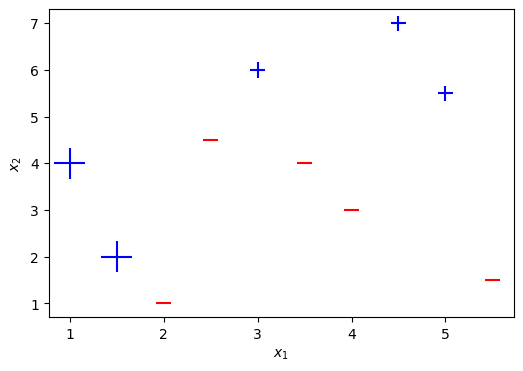

In [13]:
plot_samples(x1, x2, y, D2)
plt.savefig('figures/adaboost_round2.pdf', bbox_inches='tight')

Second round

In [14]:
# h2 = (x1 <= 1.5)
incorrect = [4, 7, 8]
e2 = np.sum(D2[incorrect])
e2

0.1875

In [15]:
alpha2 = 0.5 * np.log((1 - e2) / e2)
alpha2

0.7331685343967135

In [16]:
0.0625 * np.exp(0.733)

0.13008219979404687

In [17]:
0.25 * np.exp(-0.733)

0.12011635738585556

In [18]:
0.0625 * np.exp(-0.733)

0.03002908934646389

In [19]:
3 * 0.13 + 2 * 0.12 + 5 * 0.03

0.78

In [20]:
0.13 / 0.78

0.16666666666666666

In [21]:
0.12 / 0.78

0.15384615384615383

In [22]:
0.03 / 0.78

0.03846153846153846

In [23]:
D3 = update_distribution(D2, alpha2, incorrect)
D3

array([0.15384615, 0.15384615, 0.03846154, 0.03846154, 0.16666667,
       0.03846154, 0.03846154, 0.16666667, 0.16666667, 0.03846154])

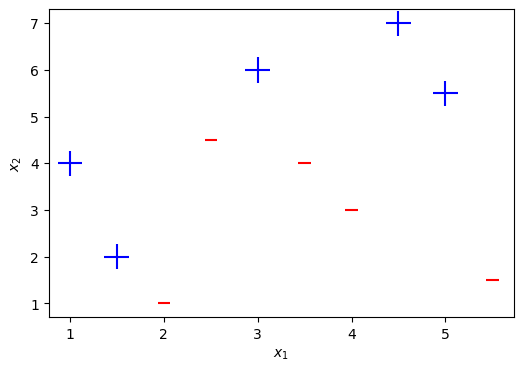

In [24]:
plot_samples(x1, x2, y, D3)
plt.savefig('figures/adaboost_round3.pdf', bbox_inches='tight')

Third round

In [25]:
# h3 = (x1 <= 5)
incorrect = [3, 5, 6]
e3 = np.sum(D3[incorrect])
e3

0.11538461538461542

In [26]:
e3 = 3 * 0.038
e3

0.11399999999999999

In [27]:
alpha3 = 0.5 * np.log((1 - e3) / e3)
alpha3

1.0252592511052927

In [28]:
-alpha1 + alpha2 + alpha3

1.065280604942061

In [29]:
-alpha1 - alpha2 - alpha3

-2.4515749660619512

In [30]:
-alpha1 - alpha2 + alpha3

-0.40105646385136606

In [31]:
alpha1 - alpha2 + alpha3

0.9852378972685245